In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling#funcion para ver missing values por variables en DF**
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing,  svm
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import mglearn

In [3]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [4]:
data = pd.read_csv('seismic-bumps-2.csv')


# Preprocesamiento de datos para SVM

In [5]:
#valores omitidos por variable
missing_values_table(data)

,Missing Values,% of Total Values
Fseismic,0,0.0
seismoacoustic,0,0.0
shift,0,0.0
genergy,0,0.0
gpuls,0,0.0
gdenergy,0,0.0
gdpuls,0,0.0
ghazard,0,0.0
nbumps,0,0.0
nbumps2,0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
Fseismic          2584 non-null object
seismoacoustic    2584 non-null object
shift             2584 non-null object
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null object
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
nbumps6           2584 non-null float64
nbumps7           2584 non-null float64
nbumps89          2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null int64
dtypes: float64(14), int64(1), object(4)
memory usage: 383.6+ KB


In [7]:
data[data.duplicated()]

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
89,a,a,N,63550.0,325.0,15.0,35.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90,a,a,W,194580.0,697.0,-35.0,-32.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
972,a,b,N,5250.0,66.0,-49.0,36.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
973,a,b,N,19420.0,60.0,98.0,20.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1017,a,a,N,590.0,11.0,-74.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1018,a,a,N,3720.0,43.0,75.0,8.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
data_new =data.drop_duplicates()

In [9]:
data_new = data_new.drop(['energy','nbumps6','nbumps7','nbumps89'], axis=1)

In [10]:
data_new.groupby("class").count()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy
class,,,,,,,,,,,,,,
0,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408
1,170,170,170,170,170,170,170,170,170,170,170,170,170,170


In [11]:
# numerizar las variables: 
#“Fseismic” -  “seismoacoustic” -  “shift” - “ghazard” 
labelEncoder = LabelEncoder()
data_new['Fseismic'] = labelEncoder.fit_transform(data_new['Fseismic'])
data_new['seismoacoustic'] = labelEncoder.fit_transform(data_new['seismoacoustic'])
data_new['shift'] = labelEncoder.fit_transform(data_new['shift'])
data_new['ghazard'] = labelEncoder.fit_transform(data_new['ghazard'])
data_new.ghazard.unique()

array([0, 1, 2], dtype=int64)

# Normalizacion de datos para algoritmo SVM

In [16]:
##Estandarización . Normalizacion Datos
scaler = preprocessing.MinMaxScaler()
df_normal= pd.DataFrame(scaler.fit_transform(data_new), index=data_new.index, columns=data_new.columns)

C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
df_normal.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy,class
0,0.0,0.0,0.0,0.005810,0.010186,0.017897,0.025696,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0
1,0.0,0.0,0.0,0.005633,0.006864,0.019389,0.018201,0.0,0.111111,0.0,0.142857,0.0,0.0,0.0050,0.0
2,0.0,0.0,0.0,0.003063,0.006200,0.011186,0.019272,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0
3,0.0,0.0,0.0,0.011065,0.037422,0.054437,0.145610,0.0,0.111111,0.0,0.142857,0.0,0.0,0.0075,0.0
4,0.0,0.0,0.0,0.004831,0.012179,0.024609,0.047109,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0


# Implementacion SVM

### arreglo de valores X,y

In [147]:
X=np.array(df_normal.drop(['class'],1) )
y=np.array(df_normal['class'])
X.shape

(2578, 14)

In [148]:
y.shape

(2578,)

##  Split train and test data sets: 60% Training and 40% testing

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=0)

In [158]:
#Data Set de Entrenamiento y Prueba
X_train.shape, X_test.shape

((1546, 14), (1032, 14))

In [159]:
 X_test.shape, y_test.shape

((1032, 14), (1032,))

## Linea SVM

###  Metricas inciales con validacion cruzada & Shuffle data

In [160]:
#computing the score 5 consecutive times (with different splits each time)
clf_ = svm.SVC(kernel='linear', C=0.01)
scores = cross_val_score(clf_, X, y, cv=5)
print("Accuracy Obtenida en promedio: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy Obtenida en promedio: 0.93 (+/- 0.00)


In [161]:
#shufle data
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores_ = cross_val_score(clf_, X, y, cv=kfold)
print("Accuracy Obtenida en promedio: %0.2f (+/- %0.2f)" % (scores_.mean(), scores_.std() * 2))
print("Numero de Iteraciones cv : ", len(scores_))

Accuracy Obtenida en promedio: 0.93 (+/- 0.02)
Numero de Iteraciones cv :  5


### Variacion Parametro de regulacion C (regula los pesos asignados a las variables) y Parametro gamma (determina la medida de cercania de puntos, con kernel='linear' no aplica el parametro gamma, solo para propositos de observacion), clases (0,1) con igual peso.

In [154]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
clf0 = svm.SVC(kernel='linear', C=0.1, gamma=0.1,random_state=0)
scores = cross_val_score(clf0, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Number of cv iterations: ", len(scores))


Accuracy: 0.93 (+/- 0.02)
Number of cv iterations:  5


### Variacion del peso dado a las clases (0,1) con class_weight. En el set datos hay un desbalance de la clase 1 (170)  con respecto a la clase 0 (2408)  relativa 1:14

In [ ]:
class_weight={1: 12}

In [182]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True,random_state=0)
clf0 = svm.SVC(kernel='linear', C=0.1,random_state=0,class_weight={1:14})
scores = cross_val_score(clf0, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Number of cv iterations: ", len(scores))

Accuracy: 0.80 (+/- 0.01)
Number of cv iterations:  5


In [184]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True,random_state=0)
clf0 = svm.SVC(kernel='linear', C=0.1,random_state=0,class_weight="balanced")
scores = cross_val_score(clf0, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Number of cv iterations: ", len(scores))

Accuracy: 0.77 (+/- 0.08)
Number of cv iterations:  5


### Se observa que la Accuracy del modelo baja  cuando se balancean las clases, por el aumento de los falsos positivos y true positivos, de la clase minoritaria (1, positiva) como se observa con la evaluacion del modelo.

## Evaluacion del Modelo

### Parametro de regulacion C = 0.1 y Clases Desbalanceadas o el mismo peso a las clases, Prediccion con el set de prueba

Accuracy: 0.9312015503875969
F1 score: 0.8980277871776022
Recall: 0.9312015503875969
Precision: 0.867136327444264
Soporte Vectorial: 5236

 clasification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       961
         1.0       0.00      0.00      0.00        71

   micro avg       0.93      0.93      0.93      1032
   macro avg       0.47      0.50      0.48      1032
weighted avg       0.87      0.93      0.90      1032


 Matriz de Confusion:
 [[961   0]
 [ 71   0]]


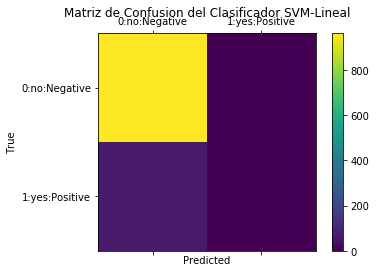

In [221]:
import warnings
warnings.filterwarnings('ignore')
wclf = svm.SVC(kernel='linear', C= 0.1,random_state=0)

wclf.fit(X, y)
weighted_prediction = wclf.predict(X_test)

print( 'Accuracy:', accuracy_score(y_test, weighted_prediction))
print( 'F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print( 'Recall:', recall_score(y_test, weighted_prediction, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))
print('Soporte Vectorial:', wclf.support_vectors_.size)
print ('\n clasification report:\n', classification_report(y_test, weighted_prediction))
print ('\n Matriz de Confusion:\n',confusion_matrix(y_test, weighted_prediction))
cm = confusion_matrix(y_test, weighted_prediction)

labels = ['0:no:Negative', '1:yes:Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusion del Clasificador SVM-Lineal')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Se observa alta accuracy del modelo, pero para la clase minoritaria positiva (1) no detecto  ni true positivos , ni false positivos, por lo cual es necesario balancear los pesos de las clases

### Parametro de regulacion C = 0.1 y Clases Balanceadas, Prediccion con el set de prueba

In [222]:
wclf = svm.SVC(kernel='linear', C= 0.1,class_weight="balanced",random_state=0)

wclf.fit(X, y)
weighted_prediction = wclf.predict(X_test)

print( 'Accuracy:', accuracy_score(y_test, weighted_prediction))
print( 'F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print( 'Recall:', recall_score(y_test, weighted_prediction, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))
print('Soporte Vectorial:', wclf.support_vectors_.size)
print ('\n clasification report:\n', classification_report(y_test, weighted_prediction))
print ('\n Matriz de Confusion:\n',confusion_matrix(y_test, weighted_prediction))
cm = confusion_matrix(y_test, weighted_prediction)

Accuracy: 0.7965116279069767
F1 score: 0.840983757844223
Recall: 0.7965116279069767
Precision: 0.9145699121844418
Soporte Vectorial: 25858

 clasification report:
               precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       961
         1.0       0.20      0.63      0.30        71

   micro avg       0.80      0.80      0.80      1032
   macro avg       0.58      0.72      0.59      1032
weighted avg       0.91      0.80      0.84      1032


 Matriz de Confusion:
 [[777 184]
 [ 26  45]]


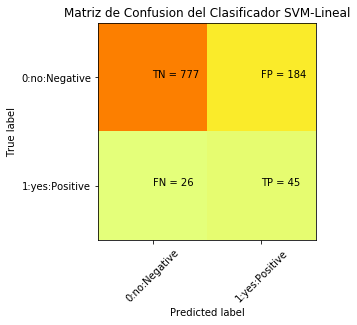

In [223]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0:no:Negative', '1:yes:Positive']
plt.title('Matriz de Confusion del Clasificador SVM-Lineal')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


###  Se observa que con el balanceo de las clases las metricas para la clase positiva mejoran.

### Si requiere mayor exactitud para predecir la clase positiva y si son las condiciones requeridas por el negocio, se debe dar mayor peso a esta clase 

Text(0, 0.5, 'Recall')

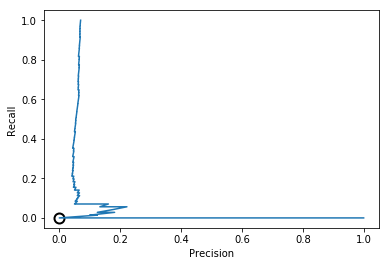

In [230]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

svc = svm.SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [227]:
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, wclf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Size')
plt.ylabel('Versicolor')
plt.legend()
plt.show()

ValueError: X.shape[1] = 2 should be equal to 14, the number of features at training time

<Figure size 432x288 with 0 Axes>

# grilla

In [ ]:
# naive grid search implementation
#
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
# for each combination of parameters, train an SVC
svm = SVC(gamma=gamma, C=C)
svm.fit(X_train, y_train)
# evaluate the SVC on the test set
score = svm.score(X_test, y_test)
# if we got a better score, store the score and parameters
if score > best_score:
best_score = score
best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [63]:
best_score =0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    wclf = svm.SVC(kernel='linear', C=C, class_weight={1: 12},random_state=0)
    wclf.fit(X_train, y_train)
    score  = wclf.score(X_test,y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.93
Best parameters: {'C': 0.001}


In [56]:
wclf = svm.SVC(kernel='linear', C= 1, class_weight={1: 10})
wclf.fit(X, y)
weighted_prediction = wclf.predict(X_test)
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
weighted_prediction

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
#the radial basis function (RBF) kernel, also known as the
#Gaussian kernel. The Gaussian kernel

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


Text(0, 0.5, 'Feature 1')

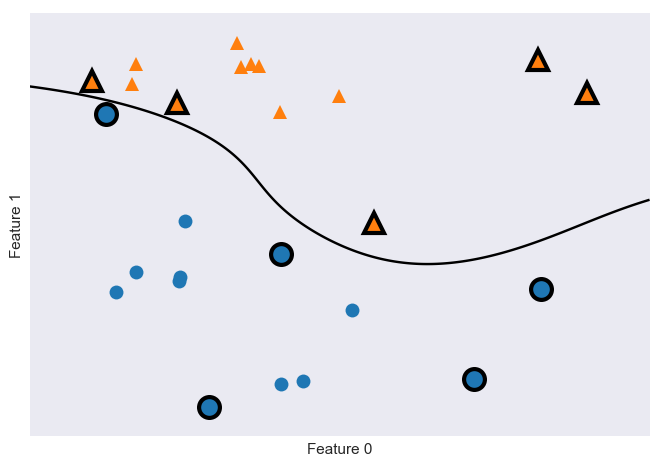

In [397]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.5).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
print(X)
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [114]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.1.


In [345]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[2408,    0],
       [ 170,    0]], dtype=int64)

In [306]:
svm =svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(X, y)
scores = cross_val_score(svm, X, y, cv=5)
scores   

array([0.93410853, 0.93410853, 0.93410853, 0.93398058, 0.93398058])

In [283]:
scores = cross_validate(svm, X, y, scoring=scoring,  cv=4, return_train_score=False)
sorted(scores.keys())

C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [284]:
scores['test_precision_macro']

array([0.46666667, 0.46666667, 0.4673913 , 0.4673913 ])

In [299]:
#from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
scores = cross_validate(svm, X, y, scoring=scoring,  cv=4, return_train_score=False)
sorted(scores.keys())


C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rsantacruz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']